In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
from scipy import stats
import astropy.units as u
import astropy.constants as c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
from preprocessing.step_size import *

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

In [2]:
from dm21cm.injections.pbh import PBHInjection
from dm21cm.utils import abscs

In [3]:
inj = PBHInjection(m_PBH=10**13.25, f_PBH=1e-10)
inj.set_binning(abscs)

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


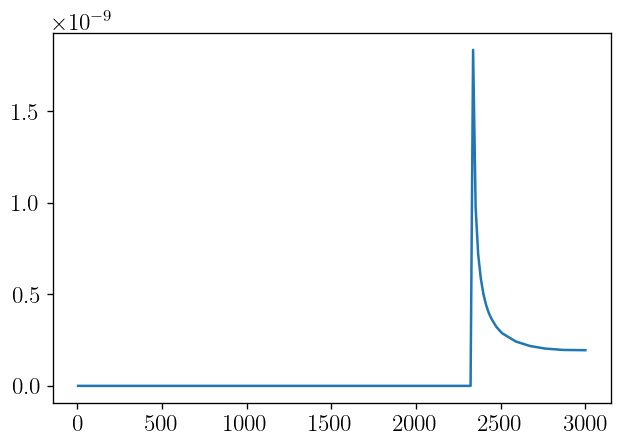

In [6]:
z_s = np.geomspace(5, 3000, 1000)
p = [inj.inj_power(z=z) for z in z_s]
plt.plot(z_s, p)

In [29]:
import pickle
s1 = pickle.load(open("/n/holyscratch01/iaifi_lab/yitians/dm21cm/21cmFAST-cache/pbh-fine_log10m15.000_injm1/dh_init_soln.p", 'rb'))
s2 = pickle.load(open("/n/holyscratch01/iaifi_lab/yitians/dm21cm/21cmFAST-cache/pbh-fine_log10m15.000_injm2/dh_init_soln.p", 'rb'))

[]

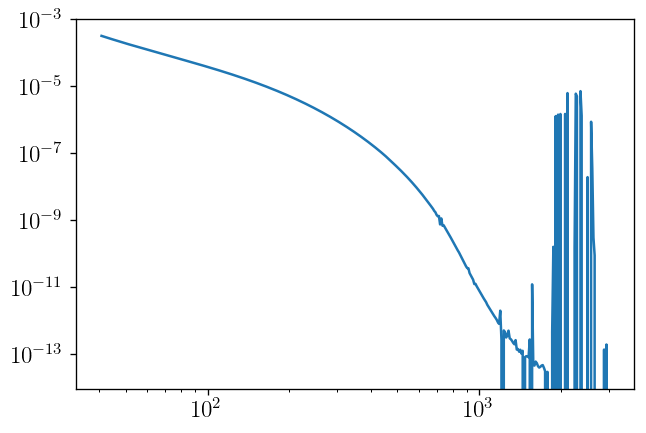

In [30]:
plt.plot(s1['rs'], (s2['Tm']-s1['Tm'])/s1['Tm'])
plt.loglog()

[]

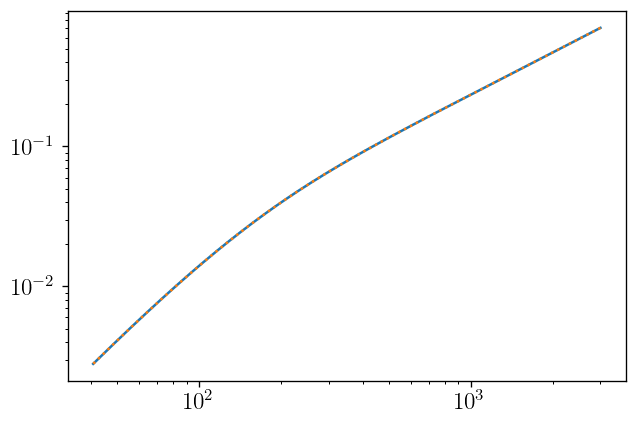

In [31]:
plt.plot(s1['rs'], s1['Tm'])
plt.plot(s2['rs'], s2['Tm'], ':')
plt.loglog()

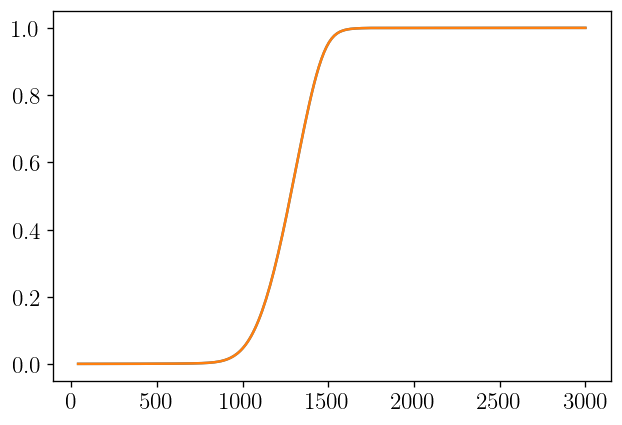

In [19]:
plt.plot(s1['rs'], s2['x'][:, 0])
plt.plot(s1['rs'], s1['x'][:, 0])

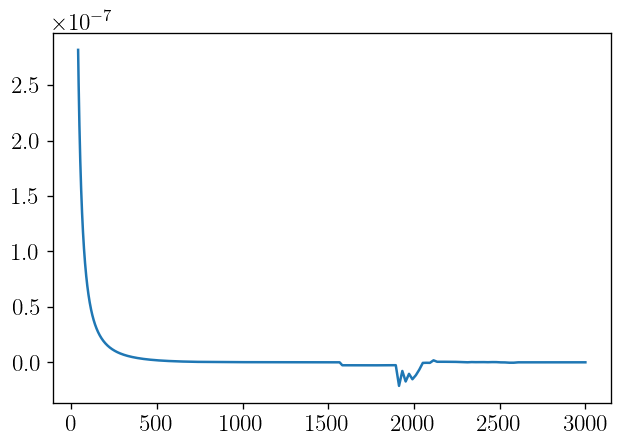

In [32]:
plt.plot(s1['rs'], (s2['x'][:, 0] - s1['x'][:, 0]))

In [33]:
s1['highengphot'][-1].toteng()

1.778085038642395e-06

[]

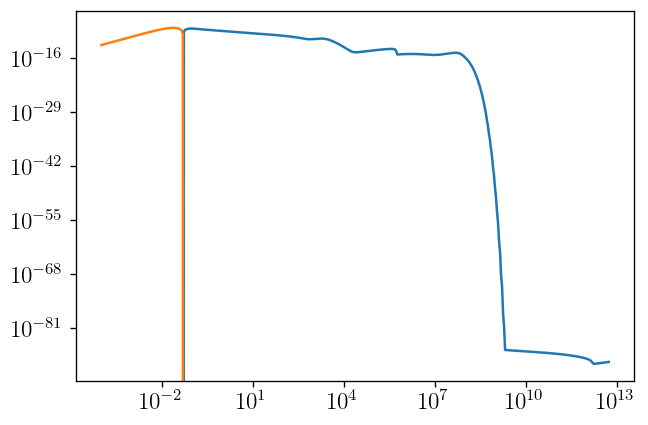

In [34]:
plt.plot(s1['highengphot'][-1].eng, s1['highengphot'][-1].N)
plt.plot(s1['highengphot'][-1].eng, -s1['highengphot'][-1].N)
plt.loglog()

In [ ]:
plt.plot(s1['rs'], (s2['Tm'] - s1['Tm'])/s1['Tm'])

In [2]:
mass_s, inj_s, sigma_s = np.loadtxt(f"{WDIR}/outputs/limits/pbh_limits.txt", unpack=True)
mass2_s, inj2_s, sigma2_s = np.loadtxt(f"{WDIR}/outputs/limits/pbh_limits_tmp.txt", unpack=True)

[(1e-18, 1000.0), (10000000000000.0, 2e+18)]

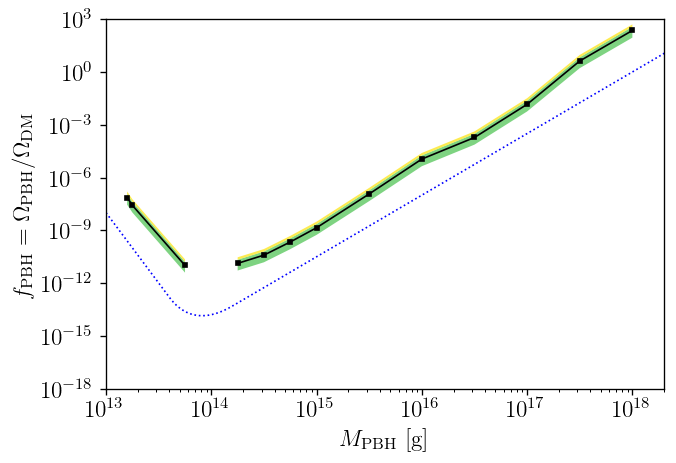

In [3]:
extras = False

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# our limits
one_sigma = inj_s * sigma_s
upper_limit = np.sqrt(stats.chi2.ppf(.9, df=1)) * one_sigma
ax.plot(mass_s, upper_limit, 'k-s', lw=1, ms=2)
ax.fill_between(mass_s, upper_limit+one_sigma, upper_limit-one_sigma, color=mpl.colormaps['viridis'](0.75), alpha=0.8, ec='none')
ax.fill_between(mass_s, upper_limit+2*one_sigma, upper_limit+one_sigma, color=mpl.colormaps['viridis'](1.0), alpha=0.8, ec='none')

# our limits
one_sigma = inj2_s * sigma2_s
upper_limit = np.sqrt(stats.chi2.ppf(.9, df=1)) * one_sigma
ax.plot(mass2_s, upper_limit, 'k-s', lw=1, ms=2)
ax.fill_between(mass2_s, upper_limit+one_sigma, upper_limit-one_sigma, color=mpl.colormaps['viridis'](0.75), alpha=0.8, ec='none')
ax.fill_between(mass2_s, upper_limit+2*one_sigma, upper_limit+one_sigma, color=mpl.colormaps['viridis'](1.0), alpha=0.8, ec='none')

m_s = np.geomspace(1e13, 1e19, 1000)
ax.plot(m_s, pbh_f(m_s), 'b:', lw=1)

ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'$M_\mathrm{PBH}$ [g]', ylabel=r'$f_\mathrm{PBH}=\Omega_\mathrm{PBH}/\Omega_\mathrm{DM}$')
ax.set(ylim=(1e-18, 1e3), xlim=(1e13, 2e18))

In [4]:
np.linspace(13.5, 18, 19)

array([13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  ])